In [51]:
from skimage.io import imread
import skimage
import numpy as np
image = imread('parrots.jpg')
img=image.copy()
image = skimage.util.img_as_float(image)
image = np.reshape(image, (-1, image.shape[2]))

In [52]:
from sklearn.cluster import KMeans





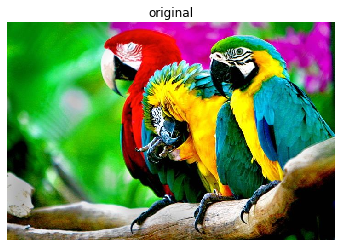

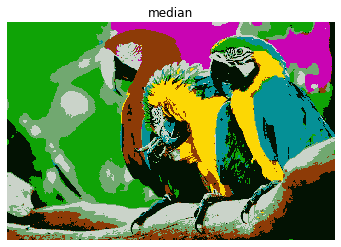

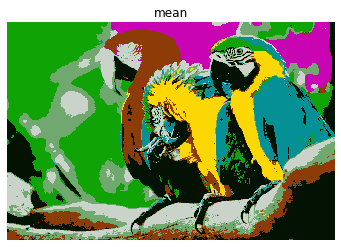

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('original')
plt.imshow(img)
X_median=np.reshape(X_median,(img.shape[0],img.shape[1],3))
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('median')
plt.imshow(X_median)
X_mean=np.reshape(X_mean,(img.shape[0],img.shape[1],3))
plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('mean')
plt.imshow(X_median)

996.2617428634958

In [58]:
def PSNR(I,K):
    A=(I-K)**2
    B=np.sum(A,axis=1)
    mse=np.sum(B)
    mse=mse/(I.shape[0]*3)
    psnr=20*np.log10(1/np.sqrt(mse))
    return psnr

In [59]:
PSNR(image,X_mean)

20.633762962809318

In [61]:
psnr_num=[]
for k in range(1,14):
    print(k)
    print(psnr_num)
    clst=KMeans(init='k-means++',random_state=241,n_clusters=k)
    clst.fit(image)
    labels=clst.predict(image)
    X_median = image.copy()
    for i in range(clst.n_clusters):
        X_median[labels==i] = np.median(image[labels==i], axis=0)
    X_mean = image.copy()
    for i,value in enumerate(clst.cluster_centers_):        
        X_mean[labels == i] = value
    psnr_num.append([k,PSNR(image,X_mean),PSNR(image,X_median)])
    

1
[]
2
[[1, 9.837758895356929, 9.460408259198369]]
3
[[1, 9.837758895356929, 9.460408259198369], [2, 12.112036953509786, 11.683052005520253]]
4
[[1, 9.837758895356929, 9.460408259198369], [2, 12.112036953509786, 11.683052005520253], [3, 13.176043279676602, 12.806994450919483]]
5
[[1, 9.837758895356929, 9.460408259198369], [2, 12.112036953509786, 11.683052005520253], [3, 13.176043279676602, 12.806994450919483], [4, 14.39431053391301, 14.042908374073326]]
6
[[1, 9.837758895356929, 9.460408259198369], [2, 12.112036953509786, 11.683052005520253], [3, 13.176043279676602, 12.806994450919483], [4, 14.39431053391301, 14.042908374073326], [5, 15.56005459061295, 15.20475940340906]]
7
[[1, 9.837758895356929, 9.460408259198369], [2, 12.112036953509786, 11.683052005520253], [3, 13.176043279676602, 12.806994450919483], [4, 14.39431053391301, 14.042908374073326], [5, 15.56005459061295, 15.20475940340906], [6, 16.572728340225947, 16.082260425341982]]
8
[[1, 9.837758895356929, 9.460408259198369], [2, 1

In [62]:
f1 = open('1.txt', 'w')
for i in psnr_num:
    if (i[1]>20)or(i[2]>20):
        f1.write(str(i[0]))
        break
f1.close()
